## Датасет Census Income ##
Целевая переменная - income.

Решаем задачу бинарной классификации: модель должна предсказывать для каждого семпла, превосходит ли заработок соответствующего человека 50 тысяч долларов в год, или нет.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.shape

(48842, 15)

### Отделяем валидационную выборку ###

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = data.copy()
x.drop(columns=['income'], inplace = True)
y = data['income']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Смотрим данные: информация в колонках, пропуски ###

In [8]:
# создаем списки для последующей очистки и преобразования данных
cols_delete = []
cols_fillna = []
cols_dummies = []
cols_labelencode = []
cols_norm = []

In [9]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [10]:
data.age.value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
37    1280
28    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
39    1206
24    1206
25    1195
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
      ... 
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118
73     108
74      77
75      72
76      69
90      55
77      54
80      38
81      37
78      34
79      30
82      15
84      13
83      11
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [11]:
data.age.isnull().any()

False

In [12]:
cols_norm.append('age')

**age** - возраст человека, числовой признак, пропусков нет

In [13]:
data.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [14]:
data.workclass.isnull().any()

False

In [15]:
cols_dummies.append('workclass')

**workclass** - категориальное поле, пропусков нет (есть знак ?, это означает "не указано", вероятно)

In [16]:
data.fnlwgt.value_counts()

203488    21
190290    19
120277    19
125892    18
126569    18
126675    17
113364    17
99185     17
186934    16
111567    16
120131    15
127651    15
123011    15
117963    15
193882    14
194630    14
123983    14
108140    14
132879    14
188246    14
111483    14
121124    14
148995    14
164190    14
136986    14
216129    13
117789    13
144949    13
155489    13
156464    13
          ..
379242     1
262515     1
340341     1
37331      1
205175     1
88440      1
307589     1
371827     1
196947     1
57679      1
186696     1
303431     1
69905      1
209173     1
141590     1
284952     1
170272     1
137444     1
108838     1
106791     1
111368     1
391468     1
172037     1
198863     1
264498     1
131379     1
160061     1
334224     1
45381      1
208174     1
Name: fnlwgt, Length: 28523, dtype: int64

In [17]:
data.fnlwgt.isnull().any()

False

In [18]:
cols_norm.append('fnlwgt')

**fnlwgt** - числовое поле, пропусков нет

In [19]:
data.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [20]:
data.education.isnull().any()

False

In [21]:
cols_dummies.append('education')

**education** - категориальное поле, отражает текущий уровень образования человека, пропусков нет

In [22]:
data['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [23]:
data['educational-num'].isnull().any()

False

In [24]:
cols_delete.append('educational-num')

**educational-num** - числовое поле, смысл не совсем понятен, можно исключить из рассмотрения

In [25]:
data['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [26]:
data['marital-status'].isnull().any()

False

In [27]:
cols_dummies.append('marital-status')

**marital-status** - семейное положение, категориальное поле, пропусков нет

In [28]:
data.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [29]:
data.occupation.isnull().any()

False

In [30]:
cols_dummies.append('occupation')

**occupation** - сфера занятости, категориальное поле, пропусков нет, но есть знак ? - не указано

In [31]:
data.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [32]:
data.relationship.isnull().any()

False

In [33]:
cols_dummies.append('relationship')

**relationship** - семейное положение, категориальное поле, пропусков нет

In [34]:
data.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [35]:
data.race.isnull().any()

False

In [36]:
cols_dummies.append('race')

**race** - расовая принадлежность, категориальное поле, пропусков нет

In [37]:
data.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [38]:
data.gender.isnull().any()

False

In [39]:
cols_dummies.append('gender')

**gender** - пол человека, категориальное поле, пропусков нет

In [40]:
data['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
3103       152
5178       146
5013       117
4386       108
8614        82
3325        81
2174        74
10520       64
4650        63
27828       58
4064        54
594         52
3137        51
20051       49
14084       49
3908        42
6849        42
13550       42
2829        42
1055        37
4787        35
3411        34
14344       34
3464        33
2597        31
         ...  
9562         5
2538         5
6723         5
2050         5
11678        4
2936         4
7896         4
4931         4
4687         4
2961         4
1455         4
1424         4
3432         4
2062         3
2993         3
2009         3
6360         3
41310        3
6097         2
5060         2
18481        2
1264         2
7978         2
7262         1
1731         1
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64

In [41]:
data['capital-gain'].isnull().any()

False

In [42]:
cols_norm.append('capital-gain')

**capital-gain** - совокупная нетрудовая прибыль человека, числовое поле, пропусков нет

In [43]:
data['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
1485       71
1848       67
1590       62
1602       62
1876       59
1740       58
1672       50
1741       44
1564       43
2258       39
1719       38
1980       36
2001       35
1408       35
1669       35
2002       33
1579       30
2051       29
1974       28
1721       28
2339       27
1504       26
2377       25
1628       24
1762       20
        ...  
1411        4
4356        3
419         3
1944        3
2267        3
1510        3
1735        3
1429        3
1844        3
1648        3
3175        2
2163        2
2467        2
3683        2
2352        2
2754        2
2282        2
3900        2
810         2
1755        2
974         2
2080        1
2465        1
1911        1
155         1
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital-loss, Length: 99, dtype: int64

In [44]:
data['capital-loss'].isnull().any()

False

In [45]:
cols_norm.append('capital-loss')

**capital-loss** - совокупный нетрудовой убыток человека, числовое поле, пропусков нет

In [46]:
data['hours-per-week'].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
20     1862
30     1700
55     1051
25      958
48      770
38      714
15      623
70      437
10      425
32      423
65      355
24      354
42      338
36      336
44      310
16      303
12      247
37      242
43      227
8       218
80      210
52      205
56      141
28      140
99      137
      ...  
19       19
57       19
85       17
68       16
63       15
29       15
98       14
78       13
31       12
96        9
77        9
59        7
67        6
76        4
61        4
73        4
86        4
88        4
74        3
92        3
81        3
91        3
89        3
97        2
95        2
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64

In [47]:
data['hours-per-week'].isnull().any()

False

In [48]:
cols_norm.append('hours-per-week')

**hours-per-week** - количество рабочих часов человека в неделю, числовое поле, пропусков нет

In [49]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [50]:
data['native-country'].isnull().any()

False

In [51]:
cols_dummies.append('native-country')

**native-country** - страна происхождения, категориальное поле, пропусков нет, но есть значение ? - не указано

In [52]:
data.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [53]:
data.income.isnull().any()

False

**income** - *целевая переменная*, превосходит ли доход 50 тысяч долларов в год, бинарное категориальное поле, пропусков нет

### Очистка, преобразование и нормализация данных ###

In [54]:
print('Target preprocessing: label encoding')
print('\nData preprocessing:')
print(f'Delete: {cols_delete}')
print(f'Fillna: {cols_fillna}')
print(f'Dummies: {cols_dummies}')
print(f'Label encode: {cols_labelencode}')
print(f'Normalize: {cols_norm}')

Target preprocessing: label encoding

Data preprocessing:
Delete: ['educational-num']
Fillna: []
Dummies: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
Label encode: []
Normalize: ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']


In [55]:
# преобразуем целевую переменную
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_preprocessed = pd.Series(le.fit_transform(y_train))
y_test_preprocessed = pd.Series(le.transform(y_test))

In [56]:
print(y_train.value_counts())
print(y_train_preprocessed.value_counts())

<=50K    27880
>50K      8751
Name: income, dtype: int64
0    27880
1     8751
dtype: int64


In [57]:
print(y_test.value_counts())
print(y_test_preprocessed.value_counts())

<=50K    9275
>50K     2936
Name: income, dtype: int64
0    9275
1    2936
dtype: int64


In [58]:
# преобразуем датасет
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[cols_norm])

def preprocess_data(data):
    ret = data.copy()
    ret.drop(columns=cols_delete, inplace=True) # cols_delete - фичи для удаления
    ret[cols_norm] = scaler.transform(ret[cols_norm]) # cols_norm - фичи для нормализациии, scaler - обученный StandardScaler 
    return pd.get_dummies(ret, columns=cols_dummies) # cols_dummies - фичи для one hot encoding

x_train_preprocessed = preprocess_data(x_train)
x_test_preprocessed = preprocess_data(x_test)
print(x_train_preprocessed.shape, x_test_preprocessed.shape)

(36631, 106) (12211, 107)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [59]:
set(x_train_preprocessed.columns) - set(x_test_preprocessed.columns)

set()

In [60]:
# видно, что одно из значений фичи native-country не присутствует в тестовой выборке
# поэтому в неё нужно вручную добавить отсутствующий столбец
missing_cols = set(x_train_preprocessed.columns) - set(x_test_preprocessed.columns)
for c in missing_cols:
    x_test_preprocessed[c] = 0
x_test_preprocessed = x_test_preprocessed[x_train_preprocessed.columns]

In [61]:
set(x_train_preprocessed.columns) - set(x_test_preprocessed.columns)

set()

In [62]:
list(x_train_preprocessed.columns)

['age',
 'fnlwgt',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_?',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_?',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation

In [63]:
list(x_test_preprocessed.columns)

['age',
 'fnlwgt',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_?',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_?',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation

### Обучаем модели для решения задачи классификации ###

In [64]:
# модели: RandomForest, KNN, LogisticRegression
models = {}

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [66]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_preprocessed, y_train_preprocessed)
print(rf.score(x_test_preprocessed, y_test_preprocessed))
models['RandomForest'] = rf

0.8502170174432888


In [67]:
knn = KNeighborsClassifier()
knn.fit(x_train_preprocessed, y_train_preprocessed)
print(knn.score(x_test_preprocessed, y_test_preprocessed))
models['KNN'] = knn

0.8301531406109246


In [68]:
lr = LogisticRegression()
lr.fit(x_train_preprocessed, y_train_preprocessed)
print(lr.score(x_test_preprocessed, y_test_preprocessed))
models['LogisticRegression'] = lr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8479240029481615


### Оценим качество моделей при помощи AUC ###

In [69]:
models

{'RandomForest': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'KNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform'),
 'LogisticRegression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False)}

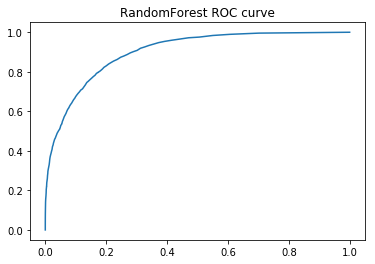

RandomForest ROC AUC score: 0.9005839215023834


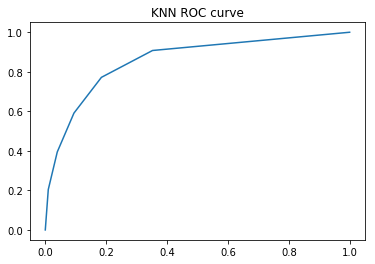

KNN ROC AUC score: 0.8571442893130725


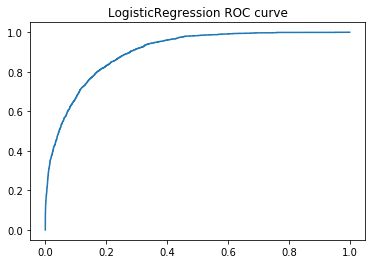

LogisticRegression ROC AUC score: 0.9021350352901428


In [70]:
from sklearn.metrics import roc_curve, roc_auc_score
for name, model in models.items():
    proba = model.predict_proba(x_test_preprocessed)
    fpr, tpr, thres = roc_curve(y_test_preprocessed, proba[:, 1])
    plt.figure()
    plt.title(f'{name} ROC curve')
    plt.plot(fpr, tpr)
    plt.show()
    print(f'{name} ROC AUC score: {roc_auc_score(y_test_preprocessed, proba[:, 1])}')

### Выводы ###

- видно, что лучший результат с точки зрения метрики *AUC* показывает модель логистической регрессии
- почти такой же показатель у модели случайного леса
- с точки зрения метрики *Accuracy* модель случайного леса имеет наилучший показатель
- модель логистической регрессии выдает почти такое же значение *Accuracy*
- модель KNN в данном случае справляется с задачей хуже, чем остальные, по данным обеих метрик